  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   3

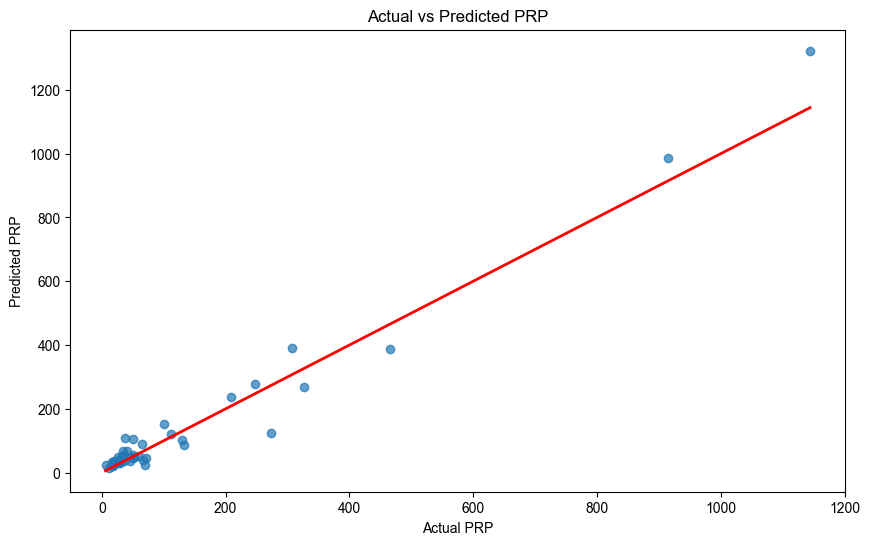

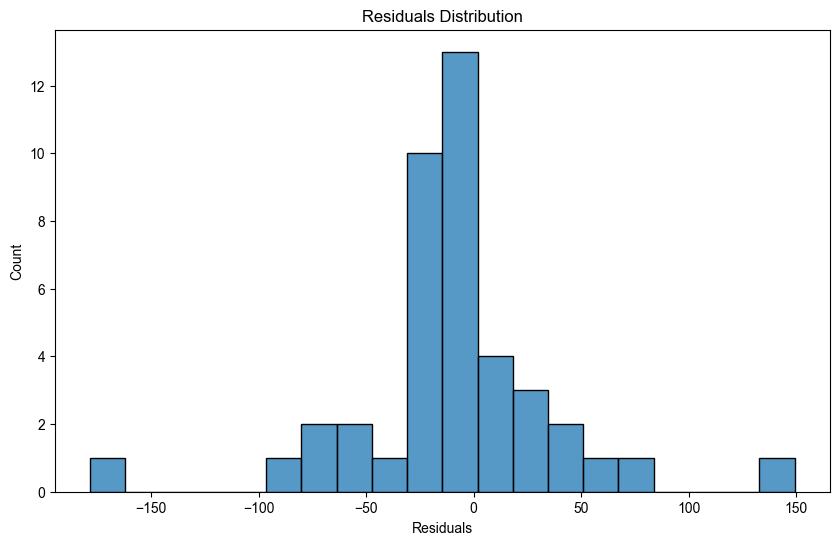

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터셋을 로드하여 데이터프레임으로 저장한다.
file_path = 'machine.data_update.csv'
data = pd.read_csv(file_path)

# 데이터의 첫 5개 행을 확인한다.
print(data.head())

# 데이터의 정보를 확인한다.
print(data.describe())

# 데이터 전처리 과정
# 데이터셋에는 여러 가지 타입의 데이터가 있기 때문에 필요한 숫자형 데이터만 선택하여 data_numeric에 저장한다.
data_numeric = data.select_dtypes(include=[np.number])

# 숫자형 데이터의 결측치를 각 열의 평균 값으로 대체하여 결측치를 처리한다.
data_numeric.fillna(data_numeric.mean(), inplace=True)

# 특성(X)과 목표 변수(y)를 정의한다.
X = data_numeric.drop('PRP', axis=1) # 'PRP'열을 제외한 모든 열을 특성 'X'로 정의한다.
y = data_numeric['PRP'] # 'PRP'열을 목표 변수 'y'로 정의한다.

# 데이터를 훈련 데이터와 테스트 데이터로 분할한다.
# 테스트 데이터는 전체 데이터의 20%로 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터를 이용하여 선형 회귀 모델을 학습시킨다.
model = LinearRegression()
model.fit(X_train, y_train)

# 학습된 모델을 이용해 테스트 데이터인 X_test에 대한 예측을 한다.
y_pred = model.predict(X_test)

# 실제값과 예측값을 시각화한다.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7) # 실제 PRP값과 예측된 PRP값을 산포도로 표시한다.
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Actual vs Predicted PRP")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
# 대각선으로 실제값과 예측값이 일치하는 선을 추가해 모델의 예측 정확도를 시각적으로 평가한다.
plt.show()

# 잔차를 시각화한다.
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred # 실제값과 예측값의 차이를 계산하여 잔차를 구한다.
sns.histplot(residuals) # 잔차의 분포를 히스토그램으로 시각화한다.
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 평가 지표 계산
# MSE 계산
# 테스트 데이터 y_test와 모델의 예측값 y_pred 간의 평균 제곱 오차를 계산한다.
mse = mean_squared_error(y_test, y_pred)
print('MSE 값 : ', mse)

# MAE 계산
# 테스트 데이터 y_test와 모델의 예측값 y_pred 간의 평균 절대 오차를 계산한다.
mae = mean_absolute_error(y_test, y_pred)
print('MAE 값 : ', mae)

# 결정 계수 계산
# R^2 점수를 계산하여 모델의 설명력을 평가한다.
r2 = r2_score(y_test, y_pred)
print('결정 계수 값 : ', r2)

# 교차검증 계산
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_mean = -cv_scores.mean()
print('교차 검증 값 : ', cv_scores_mean)

MSE 값 :  2370.096374775837
MAE 값 :  31.4062186755356
결정 계수 값 :  0.9534424890368542
교차 검증 값 :  2611.435766839486


In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 데이터셋을 로드하여 데이터프레임으로 저장한다.
file_path = 'machine.data_update.csv'
data = pd.read_csv(file_path)

# 데이터 전처리 과정
# 데이터셋에서 숫자형 데이터만 선택하여 data_numeric에 저장하고 NaN 값을 각 열의 평균 값으로 대체한다.
data_numeric = data.select_dtypes(include=[np.number])
data_numeric.fillna(data_numeric.mean(), inplace=True)

# 특성(X)과 목표 변수(y)를 한다.
X = data_numeric.drop('PRP', axis=1) # 'PRP'열을 제외한 모든 열을 특성 'X'로 정의한다.
y = data_numeric['PRP'] # 'PRP'열을 목표 변수 'y'로 정의한다.

# 데이터를 훈련 데이터와 테스트 데이터로 분할한다.
# 테스트 데이터는 전체 데이터의 20%로 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
# StandardScaler 를 사용하여 특성을 표준화한다. 훈련 데이터에 맞춰 스케일링을 수행하고, 테스트 데이터도
# 같은 방법으로 스케일링한다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 다항 특성 추가
# PolynomialFeatures 를 사용하여 특성에 다항 특성을 추가한다. 2차 다항 특성을 추가하였다.
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Ridge 회귀 모델 학습
# Ridge 모델을 생성하고, alpha 값을 1.0으로 설정하여 Ridge 회귀 모델을 학습시킨다.
ridge_model = Ridge(alpha=1.0)  # alpha 값을 조정해야 합니다.
ridge_model.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측
y_pred = ridge_model.predict(X_test_poly)

# 평가 지표 계산
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('결정 계수 값 : ', r2)
print('MSE 값 : ', mse)


결정 계수 값 :  0.9803469403072821
MSE 값 :  1000.4754242089041
